In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [3]:
master_movie = pd.read_csv('data/master_movie.csv', index_col=0)
master_movie.head()

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,genres,averagerating,numvotes,category,name
0,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"Action,Adventure,Fantasy",6.6,447624,actor,Johnny Depp
1,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"Action,Adventure,Fantasy",6.6,447624,actress,Penélope Cruz
2,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"Action,Adventure,Fantasy",6.6,447624,actor,Ian McShane
3,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"Action,Adventure,Fantasy",6.6,447624,actor,Geoffrey Rush
4,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"Action,Adventure,Fantasy",6.6,447624,director,Rob Marshall


In [4]:
genre_df = master_movie.copy()

In [202]:
genre_df.shape

(1393, 16)

In [204]:
genre_df.drop_duplicates(subset='movie', ignore_index=True, inplace=True)

In [205]:
genre_df.shape

(1157, 16)

In [206]:
genre_df.loc[genre_df['movie'] == 'Coco', 'genres'] = "Family,Adventure"

In [262]:
genre_df.loc[genre_df['movie'] == 'Red', 'genres'] = "Action, Comedy"

In [263]:
genre_df.head()

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,genres,averagerating,numvotes,category,name,genre_1,genre_2,genre_3,ROI
0,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"Action,Adventure,Fantasy",6.6,447624,actor,Johnny Depp,Action,Adventure,Fantasy,154.667286
1,tt2395427,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,BV,"Action,Adventure,Sci-Fi",7.3,665594,producer,Kevin Feige,Action,Adventure,Sci-Fi,324.384139
2,tt4154756,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,BV,"Action,Adventure,Sci-Fi",8.5,670926,actor,Robert Downey Jr.,Action,Adventure,Sci-Fi,582.711400
3,tt0974015,2017-11-17,Justice League,300000000,229024295,655945209,WB,"Action,Adventure,Fantasy",6.5,329135,actor,Ben Affleck,Action,Adventure,Fantasy,118.648403
4,tt2379713,2015-11-06,Spectre,300000000,200074175,879620923,Sony,"Action,Adventure,Thriller",6.8,352504,actor,Daniel Craig,Action,Adventure,Thriller,193.206974


In [264]:
genre_df[['genre_1', 'genre_2', 'genre_3']] = genre_df['genres'].str.split(',', expand=True)
genre_df.head()

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,genres,averagerating,numvotes,category,name,genre_1,genre_2,genre_3,ROI
0,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"Action,Adventure,Fantasy",6.6,447624,actor,Johnny Depp,Action,Adventure,Fantasy,154.667286
1,tt2395427,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,BV,"Action,Adventure,Sci-Fi",7.3,665594,producer,Kevin Feige,Action,Adventure,Sci-Fi,324.384139
2,tt4154756,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,BV,"Action,Adventure,Sci-Fi",8.5,670926,actor,Robert Downey Jr.,Action,Adventure,Sci-Fi,582.711400
3,tt0974015,2017-11-17,Justice League,300000000,229024295,655945209,WB,"Action,Adventure,Fantasy",6.5,329135,actor,Ben Affleck,Action,Adventure,Fantasy,118.648403
4,tt2379713,2015-11-06,Spectre,300000000,200074175,879620923,Sony,"Action,Adventure,Thriller",6.8,352504,actor,Daniel Craig,Action,Adventure,Thriller,193.206974


In [265]:
genre_df['release_date'].value_counts()

2010-10-08    8
2014-10-10    7
2011-04-01    6
2011-09-23    6
2016-06-24    6
             ..
2012-08-15    1
2014-01-10    1
2011-05-27    1
2018-09-07    1
2012-01-06    1
Name: release_date, Length: 526, dtype: int64

In [266]:
genre_df.loc[genre_df['release_date'] == '2010-10-08']

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,genres,averagerating,numvotes,category,name,genre_1,genre_2,genre_3,ROI
449,tt1055292,2010-10-08,Life as We Know It,38000000,53374681,105887837,WB,"Comedy,Drama,Romance",6.6,113077,actress,Katherine Heigl,Comedy,Drama,Romance,178.652203
473,tt1028576,2010-10-08,Secretariat,35000000,59699513,60376247,BV,"Biography,Drama,Family",7.2,24536,actress,Diane Lane,Biography,Drama,Family,72.503563
624,tt0872230,2010-10-08,My Soul to Take,25000000,14744435,16727470,Uni.,"Horror,Mystery,Thriller",4.8,18381,actor,Max Thieriot,Horror,Mystery,Thriller,-33.090120
658,tt1423995,2010-10-08,Stone,22000000,1810078,4065020,Over.,"Drama,Thriller",5.4,38667,actor,Edward Norton,Drama,Thriller,None,-81.522636
917,tt1319716,2010-10-08,It's a Wonderful Afterlife,10000000,0,1642939,UTV,"Comedy,Drama,Fantasy",5.4,1361,actor,Sanjeev Bhaskar,Comedy,Drama,Fantasy,-83.570610
950,tt0804497,2010-10-08,It's Kind of a Funny Story,8000000,6363628,6632950,Focus,"Comedy,Drama,Romance",7.1,125583,actor,Keir Gilchrist,Comedy,Drama,Romance,-17.088125
1099,tt1645089,2010-10-08,Inside Job,2000000,4311834,7799257,SPC,"Crime,Documentary",8.3,65304,director,Charles Ferguson,Crime,Documentary,None,289.962850
1114,tt1242432,2010-10-08,I Spit on Your Grave,1750000,93051,1278471,Anch.,"Horror,Thriller",6.3,68592,actress,Sarah Butler,Horror,Thriller,None,-26.944514


In [267]:
hello = genre_df.copy()

In [268]:
hello['movie'].value_counts()

Pixels                 1
Jumping the Broom      1
Winchester             1
10 Cloverfield Lane    1
Pitch Perfect 2        1
                      ..
Noah                   1
Killer Joe             1
Beautiful Boy          1
Sex Tape               1
The Grey               1
Name: movie, Length: 1157, dtype: int64

In [269]:
hello.loc[hello['movie'] == 'Split']

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,genres,averagerating,numvotes,category,name,genre_1,genre_2,genre_3,ROI
993,tt2660118,2017-01-20,Split,5000000,138141585,278964806,Uni.,"Comedy,Romance,Sport",2.9,557,actress,Tracy Weiler,Comedy,Romance,Sport,5479.29612


In [270]:
hello.loc[hello['release_date'] == '2017-09-22']

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,genres,averagerating,numvotes,category,name,genre_1,genre_2,genre_3,ROI
166,tt4649466,2017-09-22,Kingsman: The Golden Circle,104000000,100234838,408803696,Fox,"Action,Adventure,Comedy",6.8,230797,producer,David Reid,Action,Adventure,Comedy,293.080477
563,tt3881784,2017-09-22,Stronger,30000000,4211129,8786752,RAtt.,"Biography,Drama",7.0,33464,producer,Todd Lieberman,Biography,Drama,None,-70.710827
626,tt4622512,2017-09-22,Battle of the Sexes,25000000,12638526,18445379,FoxS,"Biography,Comedy,Drama",6.7,43245,producer,Robert Graf,Biography,Comedy,Drama,-26.218484
918,tt2277308,2017-09-22,Friend Request,9900000,3759078,11310835,ENTMP,Thriller,4.0,116,actor,Anthony Michael Hall,Thriller,None,None,14.250859


In [271]:
hello.drop(['category', 'name'], axis=1, inplace=True)

In [272]:
hello.shape

(1157, 14)

In [273]:
hello.loc[hello['release_date'] == '2017-09-22']

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,genres,averagerating,numvotes,genre_1,genre_2,genre_3,ROI
166,tt4649466,2017-09-22,Kingsman: The Golden Circle,104000000,100234838,408803696,Fox,"Action,Adventure,Comedy",6.8,230797,Action,Adventure,Comedy,293.080477
563,tt3881784,2017-09-22,Stronger,30000000,4211129,8786752,RAtt.,"Biography,Drama",7.0,33464,Biography,Drama,None,-70.710827
626,tt4622512,2017-09-22,Battle of the Sexes,25000000,12638526,18445379,FoxS,"Biography,Comedy,Drama",6.7,43245,Biography,Comedy,Drama,-26.218484
918,tt2277308,2017-09-22,Friend Request,9900000,3759078,11310835,ENTMP,Thriller,4.0,116,Thriller,None,None,14.250859


In [274]:
hello.drop_duplicates(subset='movie', ignore_index=True, inplace=True)

In [275]:
hello.shape

(1157, 14)

In [276]:
hello.loc[hello['release_date'] == '2017-09-22']

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,genres,averagerating,numvotes,genre_1,genre_2,genre_3,ROI
166,tt4649466,2017-09-22,Kingsman: The Golden Circle,104000000,100234838,408803696,Fox,"Action,Adventure,Comedy",6.8,230797,Action,Adventure,Comedy,293.080477
563,tt3881784,2017-09-22,Stronger,30000000,4211129,8786752,RAtt.,"Biography,Drama",7.0,33464,Biography,Drama,None,-70.710827
626,tt4622512,2017-09-22,Battle of the Sexes,25000000,12638526,18445379,FoxS,"Biography,Comedy,Drama",6.7,43245,Biography,Comedy,Drama,-26.218484
918,tt2277308,2017-09-22,Friend Request,9900000,3759078,11310835,ENTMP,Thriller,4.0,116,Thriller,None,None,14.250859


In [277]:
genre_df_cleaned = genre_df[['genre_1', 'genre_2', 'genre_3']].apply(pd.Series.value_counts)
genre_df_cleaned.head()

,genre_1,genre_2,genre_3
Comedy,NaN,1.0,NaN
Action,344.0,NaN,NaN
Adventure,130.0,154.0,NaN
Animation,8.0,64.0,13.0
Biography,98.0,11.0,2.0


In [278]:
#genre_df_cleaned = genre_df_cleaned.replace(np.nan, 0)
genre_df_cleaned = genre_df_cleaned.fillna(0)

In [279]:
genre_df_cleaned.head()

,genre_1,genre_2,genre_3
Comedy,0.0,1.0,0.0
Action,344.0,0.0,0.0
Adventure,130.0,154.0,0.0
Animation,8.0,64.0,13.0
Biography,98.0,11.0,2.0


In [280]:
genre_df_cleaned['total_column'] = genre_df_cleaned.sum(axis=1)

In [281]:
genre_df_cleaned

,genre_1,genre_2,genre_3,total_column
Comedy,0.0,1.0,0.0,1.0
Action,344.0,0.0,0.0,344.0
Adventure,130.0,154.0,0.0,284.0
Animation,8.0,64.0,13.0,85.0
Biography,98.0,11.0,2.0,111.0
Comedy,232.0,107.0,79.0,418.0
Crime,58.0,80.0,41.0,179.0
Documentary,14.0,2.0,0.0,16.0
Drama,204.0,277.0,105.0,586.0
Family,2.0,32.0,36.0,70.0


In [282]:
genre_df_cleaned['total_column'].sort_values(ascending=False)

Drama          586.0
Comedy         418.0
Action         344.0
Adventure      284.0
Thriller       194.0
Crime          179.0
Romance        162.0
Horror         117.0
Biography      111.0
Sci-Fi         101.0
Mystery         96.0
Fantasy         95.0
Animation       85.0
Family          70.0
Music           36.0
History         35.0
Sport           23.0
Documentary     16.0
War             11.0
Western          8.0
Musical          4.0
Unknown          1.0
 Comedy          1.0
Name: total_column, dtype: float64

In [283]:
genre_df['ROI'] = ((genre_df['worldwide_gross'] - genre_df['production_budget']) / genre_df['production_budget']) * 100

In [284]:
genre_df.head()

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,genres,averagerating,numvotes,category,name,genre_1,genre_2,genre_3,ROI
0,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"Action,Adventure,Fantasy",6.6,447624,actor,Johnny Depp,Action,Adventure,Fantasy,154.667286
1,tt2395427,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,BV,"Action,Adventure,Sci-Fi",7.3,665594,producer,Kevin Feige,Action,Adventure,Sci-Fi,324.384139
2,tt4154756,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,BV,"Action,Adventure,Sci-Fi",8.5,670926,actor,Robert Downey Jr.,Action,Adventure,Sci-Fi,582.711400
3,tt0974015,2017-11-17,Justice League,300000000,229024295,655945209,WB,"Action,Adventure,Fantasy",6.5,329135,actor,Ben Affleck,Action,Adventure,Fantasy,118.648403
4,tt2379713,2015-11-06,Spectre,300000000,200074175,879620923,Sony,"Action,Adventure,Thriller",6.8,352504,actor,Daniel Craig,Action,Adventure,Thriller,193.206974


In [285]:
action_ww_gross = genre_df[genre_df.isin(['Action']).any(axis=1)]

In [286]:
action_ww_gross['worldwide_gross'].sum()

93359556674

In [287]:
genre_list = ['Drama', 'Comedy', 'Action', 'Adventure', 'Thriller', 'Crime', 
              'Romance', 'Horror', 'Biography', 'Sci-Fi', 'Mystery', 'Fantasy', 
              'Animation', 'Family', 'Documentary', 'History', 'Music', 'Sport', 
              'War', 'Western', 'Musical', 'Unknown', 'News']

In [288]:
genre_ww_gross_df = genre_df[genre_df.isin(genre_list).any(axis = 1)]

In [289]:
genre_ww_gross_df.head()

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,genres,averagerating,numvotes,category,name,genre_1,genre_2,genre_3,ROI
0,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"Action,Adventure,Fantasy",6.6,447624,actor,Johnny Depp,Action,Adventure,Fantasy,154.667286
1,tt2395427,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,BV,"Action,Adventure,Sci-Fi",7.3,665594,producer,Kevin Feige,Action,Adventure,Sci-Fi,324.384139
2,tt4154756,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,BV,"Action,Adventure,Sci-Fi",8.5,670926,actor,Robert Downey Jr.,Action,Adventure,Sci-Fi,582.711400
3,tt0974015,2017-11-17,Justice League,300000000,229024295,655945209,WB,"Action,Adventure,Fantasy",6.5,329135,actor,Ben Affleck,Action,Adventure,Fantasy,118.648403
4,tt2379713,2015-11-06,Spectre,300000000,200074175,879620923,Sony,"Action,Adventure,Thriller",6.8,352504,actor,Daniel Craig,Action,Adventure,Thriller,193.206974


In [290]:
drama_ww_gross_df = genre_df[genre_df.isin(['Drama']).any(axis = 1)]
comedy_ww_gross_df = genre_df[genre_df.isin(['Comedy']).any(axis = 1)]
action_ww_gross_df = genre_df[genre_df.isin(['Action']).any(axis = 1)]
adventure_ww_gross_df = genre_df[genre_df.isin(['Adventure']).any(axis = 1)]
thriller_ww_gross_df = genre_df[genre_df.isin(['Thriller']).any(axis = 1)]
crime_ww_gross_df = genre_df[genre_df.isin(['Crime']).any(axis = 1)]
romance_ww_gross_df = genre_df[genre_df.isin(['Romance']).any(axis = 1)]
horror_ww_gross_df = genre_df[genre_df.isin(['Horror']).any(axis = 1)]
biography_ww_gross_df = genre_df[genre_df.isin(['Biography']).any(axis = 1)]
scifi_ww_gross_df = genre_df[genre_df.isin(['Sci-Fi']).any(axis = 1)]
mystery_ww_gross_df = genre_df[genre_df.isin(['Mystery']).any(axis = 1)]
fantasy_ww_gross_df = genre_df[genre_df.isin(['Fantasy']).any(axis = 1)]
animation_ww_gross_df = genre_df[genre_df.isin(['Animation']).any(axis = 1)]
family_ww_gross_df = genre_df[genre_df.isin(['Family']).any(axis = 1)]
documentary_ww_gross_df = genre_df[genre_df.isin(['Documentary']).any(axis = 1)]
history_ww_gross_df = genre_df[genre_df.isin(['History']).any(axis = 1)]
music_ww_gross_df = genre_df[genre_df.isin(['Music']).any(axis = 1)]
sport_ww_gross_df = genre_df[genre_df.isin(['Sport']).any(axis = 1)]
war_ww_gross_df = genre_df[genre_df.isin(['War']).any(axis = 1)]
western_ww_gross_df = genre_df[genre_df.isin(['Western']).any(axis = 1)]
musical_ww_gross_df = genre_df[genre_df.isin(['Musical']).any(axis = 1)]
unknown_ww_gross_df = genre_df[genre_df.isin(['Unknown']).any(axis = 1)]
news_ww_gross_df = genre_df[genre_df.isin(['News']).any(axis = 1)]

In [291]:
drama_ww_gross_df

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,genres,averagerating,numvotes,category,name,genre_1,genre_2,genre_3,ROI
23,tt0955308,2010-05-14,Robin Hood,210000000,105487148,322459006,Uni.,"Action,Adventure,Drama",6.6,239480,actor,Russell Crowe,Action,Adventure,Drama,53.551908
47,tt1856101,2017-10-06,Blade Runner 2049,185000000,92054159,259357408,WB,"Drama,Mystery,Sci-Fi",8.0,376241,producer,Andrew A. Kosove,Drama,Mystery,Sci-Fi,40.193194
50,tt0918940,2016-07-01,The Legend of Tarzan,180000000,126643061,348902025,WB,"Action,Adventure,Drama",6.3,150154,producer,Tony Ludwig,Action,Adventure,Drama,93.834458
51,tt0970179,2011-11-23,Hugo,180000000,73864507,180047784,Par.,"Adventure,Drama,Family",7.5,284869,producer,Graham King,Adventure,Drama,Family,0.026547
57,tt1640486,2015-06-19,Inside Out,175000000,356461711,854235992,BV,"Crime,Drama",4.6,1566,actor,Paul Levesque,Crime,Drama,None,388.134853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,tt1549572,2011-07-22,Another Earth,175000,1321194,2102779,FoxS,"Drama,Romance,Sci-Fi",7.0,85839,actress,Brit Marling,Drama,Romance,Sci-Fi,1101.588000
1152,tt1748207,2012-04-27,Sound of My Voice,135000,408015,429448,FoxS,"Drama,Mystery,Sci-Fi",6.6,19387,actor,Christopher Denham,Drama,Mystery,Sci-Fi,218.109630
1153,tt1742336,2012-06-15,Your Sister's Sister,120000,1597486,3090593,IFC,"Comedy,Drama",6.7,24780,actor,Mark Duplass,Comedy,Drama,None,2475.494167
1155,tt6265828,2017-07-07,A Ghost Story,100000,1594798,2769782,A24,"Drama,Fantasy,Romance",6.8,46280,actor,Casey Affleck,Drama,Fantasy,Romance,2669.782000


In [292]:
drama_ww_gross_sum = drama_ww_gross_df['worldwide_gross'].sum()
comedy_ww_gross_sum = comedy_ww_gross_df['worldwide_gross'].sum()
action_ww_gross_sum = action_ww_gross_df['worldwide_gross'].sum()
adventure_ww_gross_sum = adventure_ww_gross_df['worldwide_gross'].sum()
thriller_ww_gross_sum = thriller_ww_gross_df['worldwide_gross'].sum()
crime_ww_gross_sum = crime_ww_gross_df['worldwide_gross'].sum()
romance_ww_gross_sum = romance_ww_gross_df['worldwide_gross'].sum()
horror_ww_gross_sum = horror_ww_gross_df['worldwide_gross'].sum()
biography_ww_gross_sum = biography_ww_gross_df['worldwide_gross'].sum()
scifi_ww_gross_sum = scifi_ww_gross_df['worldwide_gross'].sum()
mystery_ww_gross_sum = mystery_ww_gross_df['worldwide_gross'].sum()
fantasy_ww_gross_sum = fantasy_ww_gross_df['worldwide_gross'].sum()
animation_ww_gross_sum = animation_ww_gross_df['worldwide_gross'].sum()
family_ww_gross_sum = family_ww_gross_df['worldwide_gross'].sum()
documentary_ww_gross_sum = documentary_ww_gross_df['worldwide_gross'].sum()
history_ww_gross_sum = history_ww_gross_df['worldwide_gross'].sum()
music_ww_gross_sum = music_ww_gross_df['worldwide_gross'].sum()
sport_ww_gross_sum = sport_ww_gross_df['worldwide_gross'].sum()
war_ww_gross_sum = war_ww_gross_df['worldwide_gross'].sum()
western_ww_gross_sum = western_ww_gross_df['worldwide_gross'].sum()
musical_ww_gross_sum = musical_ww_gross_df['worldwide_gross'].sum()
unknown_ww_gross_sum = unknown_ww_gross_df['worldwide_gross'].sum()
news_ww_gross_sum = news_ww_gross_df['worldwide_gross'].sum()

In [293]:
genre_gross_sum = [drama_ww_gross_sum, comedy_ww_gross_sum, action_ww_gross_sum, adventure_ww_gross_sum, thriller_ww_gross_sum, 
                   crime_ww_gross_sum, romance_ww_gross_sum, horror_ww_gross_sum, biography_ww_gross_sum, scifi_ww_gross_sum, mystery_ww_gross_sum, 
                   fantasy_ww_gross_sum, animation_ww_gross_sum, family_ww_gross_sum, documentary_ww_gross_sum, history_ww_gross_sum, music_ww_gross_sum, 
                   sport_ww_gross_sum, war_ww_gross_sum, western_ww_gross_sum, musical_ww_gross_sum, unknown_ww_gross_sum, news_ww_gross_sum]


In [294]:
genre_gross_sum

[47128623410,
 60844257133,
 93359556674,
 106235889900,
 27134022953,
 16859365070,
 11340817873,
 10076403693,
 9993315534,
 38353179134,
 9679904164,
 22122946991,
 33213114511,
 12636582107,
 733637113,
 3413497748,
 3201652909,
 2733915845,
 465877527,
 985817842,
 589077623,
 333238793,
 0]

In [295]:
genre_tuples = list(zip(genre_list, genre_gross_sum))

In [296]:
axis_rev = pd.DataFrame(genre_tuples, columns = ['genre', 'worldwide_gross_revenue'])

<ipython-input-297-13a57c081d31>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(labels = ylabels)


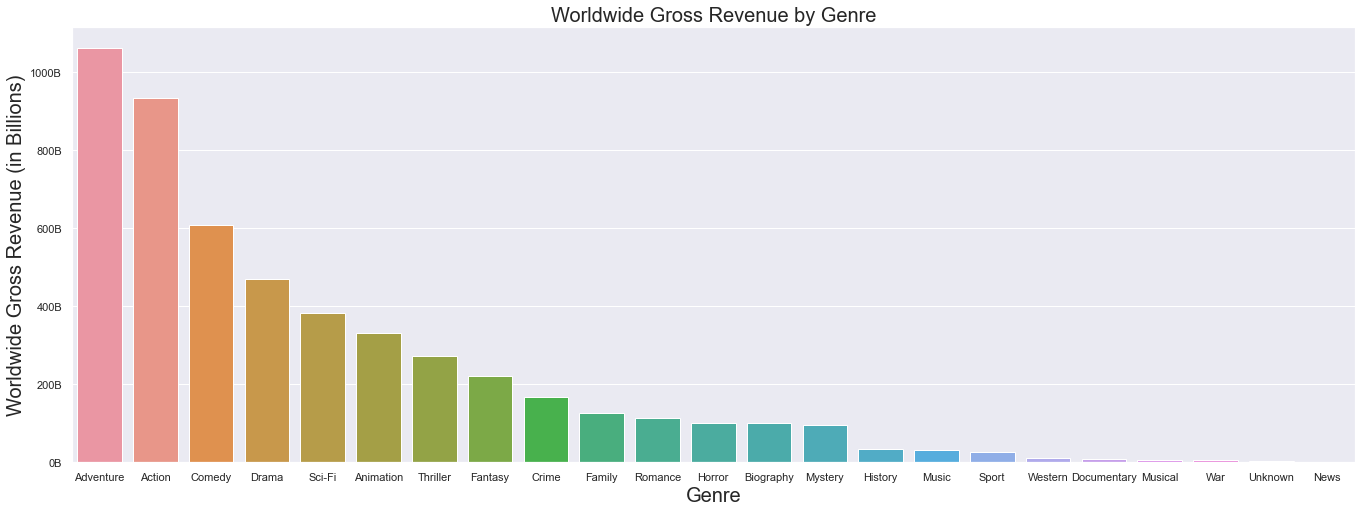

In [297]:
ylabels = ['0B', '200B', '400B', '600B', '800B', '1000B']

sns.set_style('darkgrid')
plt.figure(figsize = (23,8))
plt.ticklabel_format(style='plain')
g = sns.barplot(x = 'genre', 
            y =  'worldwide_gross_revenue', 
            data = axis_rev, 
            order = axis_rev.sort_values('worldwide_gross_revenue', ascending = False).genre)

#set labels
g.set_yticklabels(labels = ylabels)
plt.xlabel('Genre', size = 20)
plt.ylabel('Worldwide Gross Revenue (in Billions)', size = 20)
plt.title('Worldwide Gross Revenue by Genre', size = 20)
plt.show()

In [298]:
drama_ww_gross_df['ROI'].mean()

253.70824253610942

In [299]:
drama_ROI_mean = drama_ww_gross_df['ROI'].mean()
comedy_ROI_mean = comedy_ww_gross_df['ROI'].mean()
action_ROI_mean = action_ww_gross_df['ROI'].mean()
adventure_ROI_mean = adventure_ww_gross_df['ROI'].mean()
thriller_ROI_mean = thriller_ww_gross_df['ROI'].mean()
crime_ROI_mean = crime_ww_gross_df['ROI'].mean()
romance_ROI_mean = romance_ww_gross_df['ROI'].mean()
horror_ROI_mean = horror_ww_gross_df['ROI'].mean()
biography_ROI_mean = biography_ww_gross_df['ROI'].mean()
scifi_ROI_mean = scifi_ww_gross_df['ROI'].mean()
mystery_ROI_mean = mystery_ww_gross_df['ROI'].mean()
fantasy_ROI_mean = fantasy_ww_gross_df['ROI'].mean()
animation_ROI_mean = animation_ww_gross_df['ROI'].mean()
family_ROI_mean = family_ww_gross_df['ROI'].mean()
documentary_ROI_mean = documentary_ww_gross_df['ROI'].mean()
history_ROI_mean = history_ww_gross_df['ROI'].mean()
music_ROI_mean = music_ww_gross_df['ROI'].mean()
sport_ROI_mean = sport_ww_gross_df['ROI'].mean()
war_ROI_mean = war_ww_gross_df['ROI'].mean()
western_ROI_mean = western_ww_gross_df['ROI'].mean()
musical_ROI_mean = musical_ww_gross_df['ROI'].mean()
unknown_ROI_mean = unknown_ww_gross_df['ROI'].mean()
news_ROI_mean = news_ww_gross_df['ROI'].mean()

In [300]:
genres_ROI_mean = [drama_ROI_mean, comedy_ROI_mean, action_ROI_mean, adventure_ROI_mean, 
                   thriller_ROI_mean, crime_ROI_mean, romance_ROI_mean, horror_ROI_mean, 
                   biography_ROI_mean, scifi_ROI_mean, mystery_ROI_mean, fantasy_ROI_mean, 
                   animation_ROI_mean, family_ROI_mean, documentary_ROI_mean, history_ROI_mean, 
                   music_ROI_mean, sport_ROI_mean, war_ROI_mean, western_ROI_mean, 
                   musical_ROI_mean, unknown_ROI_mean, news_ROI_mean]

In [301]:
list_of_ROI_mean = list(zip(genre_list, genres_ROI_mean))

In [302]:
df_ROI_mean = pd.DataFrame(list_of_ROI_mean, columns = ['genres', 'genre_ROI_mean'])

In [303]:
df_ROI_mean.sort_values(by = 'genre_ROI_mean', ascending= False, inplace=True)
df_ROI_mean.head()

,genres,genre_ROI_mean
7,Horror,1266.272146
10,Mystery,1184.671123
4,Thriller,716.496328
17,Sport,370.518995
14,Documentary,345.269132


Text(0.5, 1.0, 'ROI(%) mean by Genre')

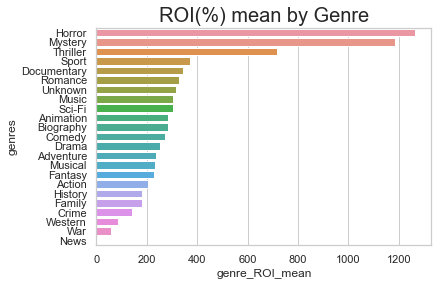

In [304]:
sns.set_theme(style='whitegrid')
fig, axes = plt.subplots()
sns.set_color_codes('pastel')
sns.barplot(x='genre_ROI_mean', y='genres', data=df_ROI_mean)
plt.title('ROI(%) mean by Genre', size = 20)

# Studio ------ begins here

In [305]:
studio = genre_df.copy()
studio.shape

(1157, 16)

In [306]:
studio.head()

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,genres,averagerating,numvotes,category,name,genre_1,genre_2,genre_3,ROI
0,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"Action,Adventure,Fantasy",6.6,447624,actor,Johnny Depp,Action,Adventure,Fantasy,154.667286
1,tt2395427,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,BV,"Action,Adventure,Sci-Fi",7.3,665594,producer,Kevin Feige,Action,Adventure,Sci-Fi,324.384139
2,tt4154756,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,BV,"Action,Adventure,Sci-Fi",8.5,670926,actor,Robert Downey Jr.,Action,Adventure,Sci-Fi,582.711400
3,tt0974015,2017-11-17,Justice League,300000000,229024295,655945209,WB,"Action,Adventure,Fantasy",6.5,329135,actor,Ben Affleck,Action,Adventure,Fantasy,118.648403
4,tt2379713,2015-11-06,Spectre,300000000,200074175,879620923,Sony,"Action,Adventure,Thriller",6.8,352504,actor,Daniel Craig,Action,Adventure,Thriller,193.206974


In [307]:
studio['year'] = pd.DatetimeIndex(studio['release_date']).year
studio_2000 = studio.loc[studio['year'] > 2000]

In [308]:
studio_2000['studio'].value_counts()

Uni.        114
Fox         106
WB           97
BV           70
Par.         69
           ... 
Neon          1
Amazon        1
OMNI/FSR      1
Saban         1
PNT           1
Name: studio, Length: 89, dtype: int64

In [309]:
studio_2000['studio'].unique()

array(['BV', 'WB', 'Sony', 'WB (NL)', 'Uni.', 'Par.', 'Fox', 'P/DW',
       'STX', 'LGF', 'LG/S', 'TriS', 'Wein.', 'MBox', 'Free', 'Rela.',
       'IFC', 'EOne', 'FD', 'ORF', 'Sum.', 'SGem', 'Focus', 'Annapurna',
       'W/Dim.', 'Studio 8', 'MGM', 'MNE', 'BG', 'Strand', 'CBS', 'BSC',
       'ENTMP', 'RTWC', 'Gold.', 'FoxS', 'RAtt.', 'SPC', 'GrtIndia',
       'BST', 'VE', 'ALP', 'Anch.', 'Yash', 'EC', 'Over.', 'A24',
       'Amazon', 'OMNI/FSR', 'Magn.', 'Mira.', 'CE', 'PH', 'KE', 'Saban',
       'Global Road', 'PFR', 'Eros', 'ATO', 'FCW', 'Neon', 'LD', 'ParV',
       'Cohen', 'Alc', 'UTV', 'App.', 'Relbig.', 'Cleopatra', 'Osci.',
       'ELS', 'WHE', 'RLJ', 'TFA', 'Jan.', 'Affirm', '3D', 'BH Tilt',
       'SMod', 'IM', 'P4', 'Drft.', 'PNT', 'Viv.', 'Orch.', 'LGP',
       'Trib.', 'BBC', 'DR'], dtype=object)

In [310]:
studio_name = list(studio_2000['studio'].value_counts().index)
studio_counts = list(studio_2000['studio'].value_counts().values)

In [311]:
list_of_studios = list(zip(studio_name, studio_counts))

In [312]:
df_studio = pd.DataFrame(list_of_studios, columns = ['name', 'count'])

In [313]:
df_studio = df_studio.loc[df_studio['count'] >= 5]

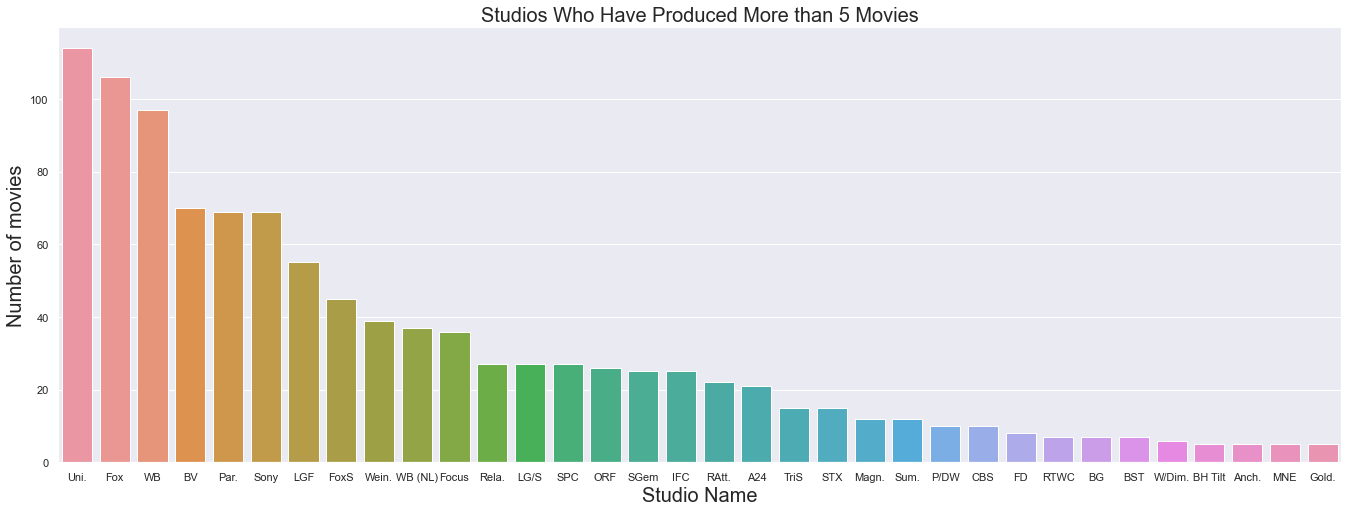

In [314]:
sns.set_style('darkgrid')
plt.figure(figsize = (23,8))
plt.ticklabel_format(style='plain')
g = sns.barplot(x = 'name', 
            y =  'count', 
            data = df_studio)


#set labels
plt.xlabel('Studio Name', size = 20)
plt.ylabel('Number of movies', size = 20)
plt.title('Studios Who Have Produced More than 5 Movies', size = 20)
plt.show()

Now we know which studios have produced at least 5 movies within the last 2 decades. However now we must take a look at which studios have produced horror, mystery, and thriller movies. As well as the production budget and ROI of the movies.

In [344]:
studio_horror = studio_2000.loc[(studio_2000['genre_1'] == "Horror") | (studio_2000['genre_2'] == "Horror") | (studio_2000['genre_3'] == "Horror") ]
studio_horror.shape

(117, 17)

In [345]:
studio_horror.head(10)

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,genres,averagerating,numvotes,category,name,genre_1,genre_2,genre_3,ROI,year
41,tt0816711,2013-06-21,World War Z,190000000,202359711,531514650,Par.,"Action,Adventure,Horror",7.0,553751,actor,Brad Pitt,Action,Adventure,Horror,179.744553,2013
55,tt4779682,2018-08-10,The Meg,178000000,145443742,529530715,WB,"Action,Horror,Sci-Fi",5.7,114042,producer,Belle Avery,Action,Horror,Sci-Fi,197.489166,2018
100,tt1077368,2012-05-11,Dark Shadows,150000000,79727149,238202668,WB,"Comedy,Fantasy,Horror",6.2,229818,producer,David Kennedy,Comedy,Fantasy,Horror,58.801779,2012
102,tt0780653,2010-02-12,The Wolfman,150000000,62189884,142634358,Uni.,"Drama,Fantasy,Horror",5.8,97873,producer,Scott Stuber,Drama,Fantasy,Horror,-4.910428,2010
185,tt2316204,2017-05-19,Alien: Covenant,97000000,74262031,238521247,Fox,"Horror,Sci-Fi,Thriller",6.4,226920,actor,Michael Fassbender,Horror,Sci-Fi,Thriller,145.898193,2017
263,tt1611224,2012-06-22,Abraham Lincoln: Vampire Hunter,67500000,37519139,137489730,Fox,"Action,Fantasy,Horror",5.9,142853,actor,Benjamin Walker,Action,Fantasy,Horror,103.688489,2012
271,tt1855325,2012-09-14,Resident Evil: Retribution,65000000,42345531,240647629,SGem,"Action,Horror,Sci-Fi",5.4,125191,actress,Milla Jovovich,Action,Horror,Sci-Fi,270.227122,2012
272,tt1418377,2014-01-24,"I, Frankenstein",65000000,19075290,74575290,LGF,"Action,Fantasy,Horror",5.1,74910,producer,Andrew Mason,Action,Fantasy,Horror,14.731215,2014
298,tt1538403,2013-08-21,The Mortal Instruments: City of Bones,60000000,31165421,75965567,SGem,"Action,Fantasy,Horror",5.9,121936,actress,Lily Collins,Action,Fantasy,Horror,26.609278,2013
308,tt1220634,2010-09-10,Resident Evil: Afterlife,57500000,60128566,295874190,SGem,"Action,Adventure,Horror",5.9,153270,producer,Robert Kulzer,Action,Adventure,Horror,414.563809,2010


In [347]:
studio_mystery = studio_2000.loc[(studio_2000['genre_1'] == "Mystery") | (studio_2000['genre_2'] == "Mystery") | (studio_2000['genre_3'] == "Mystery")]
studio_mystery.shape

(96, 17)

In [348]:
studio_mystery.head(10)

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,genres,averagerating,numvotes,category,name,genre_1,genre_2,genre_3,ROI,year
47,tt1856101,2017-10-06,Blade Runner 2049,185000000,92054159,259357408,WB,"Drama,Mystery,Sci-Fi",8.0,376241,producer,Andrew A. Kosove,Drama,Mystery,Sci-Fi,40.193194,2017
131,tt0944835,2010-07-23,Salt,130000000,118311368,290650494,Sony,"Action,Mystery,Thriller",6.4,277204,actress,Angelina Jolie,Action,Mystery,Thriller,123.577303,2010
142,tt1446714,2012-06-08,Prometheus,125000000,126477084,402448265,Fox,"Adventure,Mystery,Sci-Fi",7.0,538720,producer,David Giler,Adventure,Mystery,Sci-Fi,221.958612,2012
169,tt1371111,2012-10-26,Cloud Atlas,102000000,27108272,130673154,WB,"Action,Drama,Mystery",7.4,326473,producer,Stefan Arndt,Action,Drama,Mystery,28.110935,2012
197,tt1568346,2011-12-20,The Girl with the Dragon Tattoo,90000000,102515793,239373970,MBox,"Crime,Drama,Mystery",7.8,387580,producer,Søren Stærmose,Crime,Drama,Mystery,165.971078,2011
204,tt1840309,2014-03-21,Divergent,85000000,150947895,276014965,LG/S,"Action,Adventure,Mystery",6.7,399703,producer,Pouya Shahbazian,Action,Adventure,Mystery,224.723488,2014
214,tt1411697,2011-05-26,The Hangover Part II,80000000,254464305,586464305,WB,"Comedy,Mystery",6.5,432800,producer,Daniel Goldberg,Comedy,Mystery,None,633.080381,2011
218,tt1130884,2010-02-19,Shutter Island,80000000,128012934,299461782,Par.,"Mystery,Thriller",8.1,1005960,producer,Arnold Messer,Mystery,Thriller,None,274.327227,2010
223,tt4291590,2001-06-08,Evolution,80000000,38311134,98341932,IFC,"Drama,Mystery,Sci-Fi",6.0,5266,producer,Julien Naveau,Drama,Mystery,Sci-Fi,22.927415,2001
236,tt1670345,2013-05-31,Now You See Me,75000000,117723989,342769200,LG/S,"Crime,Mystery,Thriller",7.3,553156,producer,Alex Kurtzman,Crime,Mystery,Thriller,357.025600,2013


In [358]:
studio_thriller = studio_2000.loc[(studio_2000['genre_1'] == "Thriller") | (studio_2000['genre_2'] == "Thriller") | (studio_2000['genre_3'] == "Thriller")]
studio_thriller.shape

(194, 17)

In [359]:
studio_thriller.head(10)

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,genres,averagerating,numvotes,category,name,genre_1,genre_2,genre_3,ROI,year
4,tt2379713,2015-11-06,Spectre,300000000,200074175,879620923,Sony,"Action,Adventure,Thriller",6.8,352504,actor,Daniel Craig,Action,Adventure,Thriller,193.206974,2015
5,tt1345836,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099,WB,"Action,Thriller",8.4,1387769,producer,Emma Thomas,Action,Thriller,None,294.341491,2012
15,tt4630562,2017-04-14,The Fate of the Furious,250000000,225764765,1234846267,Uni.,"Action,Crime,Thriller",6.7,179774,actor,Vin Diesel,Action,Crime,Thriller,393.938507,2017
30,tt1074638,2012-11-08,Skyfall,200000000,304360277,1110526981,Sony,"Action,Adventure,Thriller",7.8,592221,producer,Barbara Broccoli,Action,Adventure,Thriller,455.263490,2012
39,tt2820852,2015-04-03,Furious 7,190000000,353007020,1518722794,Uni.,"Action,Crime,Thriller",7.2,335074,actor,Vin Diesel,Action,Crime,Thriller,699.327786,2015
101,tt2334879,2013-06-28,White House Down,150000000,73103784,205440387,Sony,"Action,Drama,Thriller",6.4,191791,producer,Harald Kloser,Action,Drama,Thriller,36.960258,2013
131,tt0944835,2010-07-23,Salt,130000000,118311368,290650494,Sony,"Action,Mystery,Thriller",6.4,277204,actress,Angelina Jolie,Action,Mystery,Thriller,123.577303,2010
138,tt1596343,2011-04-29,Fast Five,125000000,210031325,630163454,Uni.,"Action,Crime,Thriller",7.3,329892,producer,Michael K. Ross,Action,Crime,Thriller,404.130763,2011
143,tt1194173,2012-08-10,The Bourne Legacy,125000000,113203870,280355920,Uni.,"Action,Adventure,Thriller",6.7,268678,producer,Ben Smith,Action,Adventure,Thriller,124.284736,2012
144,tt5758778,2018-07-13,Skyscraper,125000000,68420120,304115534,Uni.,"Action,Adventure,Thriller",5.8,81193,actor,Dwayne Johnson,Action,Adventure,Thriller,143.292427,2018


In [360]:
studio_thriller.loc[studio_thriller['movie'] == "Inferno"]

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,genres,averagerating,numvotes,category,name,genre_1,genre_2,genre_3,ROI,year
240,tt1686470,2016-10-28,Inferno,75000000,34343574,219519367,Sony,Thriller,6.3,50,actor,Vi Van Hua,Thriller,None,None,192.692489,2016


In [366]:
studio_t_name = list(studio_thriller['studio'].value_counts().iloc[:5].index)
studio_t_count = list(studio_thriller['studio'].value_counts().iloc[:5].values)

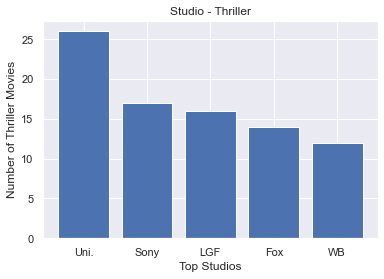

In [368]:
fig, ax = plt.subplots()

ax.bar(studio_t_name, studio_t_count)
ax.set_xlabel("Top Studios")
ax.set_ylabel("Number of Thriller Movies")
ax.set_title("Studio - Thriller");

In [369]:
studio_h_name = list(studio_horror['studio'].value_counts().iloc[:5].index)
studio_h_count = list(studio_horror['studio'].value_counts().iloc[:5].values)

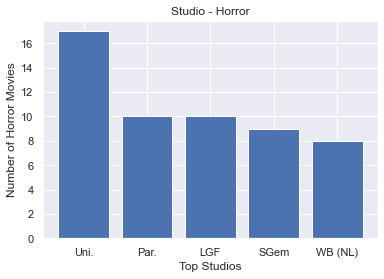

In [370]:
fig, ax = plt.subplots()

ax.bar(studio_h_name, studio_h_count)
ax.set_xlabel("Top Studios")
ax.set_ylabel("Number of Horror Movies")
ax.set_title("Studio - Horror");

In [374]:
studio_m_name = list(studio_mystery['studio'].value_counts().iloc[:5].index)
studio_m_count = list(studio_mystery['studio'].value_counts().iloc[:5].values)

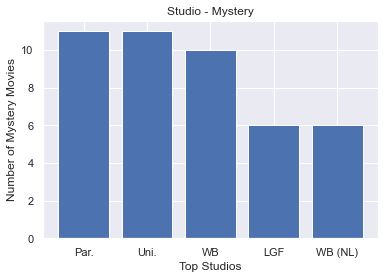

In [375]:
fig, ax = plt.subplots()

ax.bar(studio_m_name, studio_m_count)
ax.set_xlabel("Top Studios")
ax.set_ylabel("Number of Mystery Movies")
ax.set_title("Studio - Mystery");

In [376]:
studio_h_name = list(studio_horror['category'].value_counts().iloc[:5].index)
studio_h_count = list(studio_horror['studio'].value_counts().iloc[:5].values)

In [386]:
df = master_movie.copy()

In [387]:
df.shape

(9645, 12)

In [388]:
df.drop_duplicates(subset='movie_id', ignore_index=True, inplace=True)

In [389]:
df.head()

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,genres,averagerating,numvotes,category,name
0,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"Action,Adventure,Fantasy",6.6,447624,actor,Johnny Depp
1,tt2395427,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,BV,"Action,Adventure,Sci-Fi",7.3,665594,producer,Kevin Feige
2,tt4154756,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,BV,"Action,Adventure,Sci-Fi",8.5,670926,actor,Robert Downey Jr.
3,tt0974015,2017-11-17,Justice League,300000000,229024295,655945209,WB,"Action,Adventure,Fantasy",6.5,329135,actor,Ben Affleck
4,tt2379713,2015-11-06,Spectre,300000000,200074175,879620923,Sony,"Action,Adventure,Thriller",6.8,352504,actor,Daniel Craig


In [394]:
df[['genre_1', 'genre_2', 'genre_3']] = df['genres'].str.split(',', expand=True)
df.head()

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,genres,averagerating,numvotes,category,name,genre_1,genre_2,genre_3
0,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"Action,Adventure,Fantasy",6.6,447624,actor,Johnny Depp,Action,Adventure,Fantasy
1,tt2395427,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,BV,"Action,Adventure,Sci-Fi",7.3,665594,producer,Kevin Feige,Action,Adventure,Sci-Fi
2,tt4154756,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,BV,"Action,Adventure,Sci-Fi",8.5,670926,actor,Robert Downey Jr.,Action,Adventure,Sci-Fi
3,tt0974015,2017-11-17,Justice League,300000000,229024295,655945209,WB,"Action,Adventure,Fantasy",6.5,329135,actor,Ben Affleck,Action,Adventure,Fantasy
4,tt2379713,2015-11-06,Spectre,300000000,200074175,879620923,Sony,"Action,Adventure,Thriller",6.8,352504,actor,Daniel Craig,Action,Adventure,Thriller


In [397]:
horror = df.loc[(df['genre_1'] == "Horror") | (df['genre_2'] == "Horror") | (df['genre_3'] == "Horror")]

In [399]:
horror

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,genres,averagerating,numvotes,category,name,genre_1,genre_2,genre_3
44,tt0816711,2013-06-21,World War Z,190000000,202359711,531514650,Par.,"Action,Adventure,Horror",7.0,553751,actor,Brad Pitt,Action,Adventure,Horror
59,tt4779682,2018-08-10,The Meg,178000000,145443742,529530715,WB,"Action,Horror,Sci-Fi",5.7,114042,producer,Belle Avery,Action,Horror,Sci-Fi
68,tt7002100,2017-11-22,Coco,175000000,209726015,798008101,BV,Horror,7.4,35,actor,Neil Boultby,Horror,None,None
113,tt1077368,2012-05-11,Dark Shadows,150000000,79727149,238202668,WB,"Comedy,Fantasy,Horror",6.2,229818,producer,David Kennedy,Comedy,Fantasy,Horror
115,tt0780653,2010-02-12,The Wolfman,150000000,62189884,142634358,Uni.,"Drama,Fantasy,Horror",5.8,97873,producer,Scott Stuber,Drama,Fantasy,Horror
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367,tt1788391,2012-02-03,Kill List,800000,29063,462206,IFC,"Crime,Drama,Horror",6.4,32807,actor,Neil Maskell,Crime,Drama,Horror
1369,tt1594562,2012-02-03,The Innkeepers,750000,78396,1011535,Magn.,"Drama,Horror,Mystery",5.5,31089,actress,Sara Paxton,Drama,Horror,Mystery
1372,tt5253186,2010-10-29,Monsters,500000,237301,5639730,Magn.,Horror,4.0,6,actress,Qing Liu,Horror,None,None
1373,tt1612774,2011-04-01,Rubber,500000,100370,680914,Magn.,"Comedy,Fantasy,Horror",5.8,31316,actor,Stephen Spinella,Comedy,Fantasy,Horror


In [402]:
producer_horror = horror.loc[horror['category'] == "producer"]
producer_horror.head()

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,genres,averagerating,numvotes,category,name,genre_1,genre_2,genre_3
59,tt4779682,2018-08-10,The Meg,178000000,145443742,529530715,WB,"Action,Horror,Sci-Fi",5.7,114042,producer,Belle Avery,Action,Horror,Sci-Fi
113,tt1077368,2012-05-11,Dark Shadows,150000000,79727149,238202668,WB,"Comedy,Fantasy,Horror",6.2,229818,producer,David Kennedy,Comedy,Fantasy,Horror
115,tt0780653,2010-02-12,The Wolfman,150000000,62189884,142634358,Uni.,"Drama,Fantasy,Horror",5.8,97873,producer,Scott Stuber,Drama,Fantasy,Horror
306,tt1418377,2014-01-24,"I, Frankenstein",65000000,19075290,74575290,LGF,"Action,Fantasy,Horror",5.1,74910,producer,Andrew Mason,Action,Fantasy,Horror
350,tt1220634,2010-09-10,Resident Evil: Afterlife,57500000,60128566,295874190,SGem,"Action,Adventure,Horror",5.9,153270,producer,Robert Kulzer,Action,Adventure,Horror


In [405]:
producer_horror['name'].value_counts()

Sébastien K. Lemercier    3
Jason Blum                3
Brad Fuller               2
Steven Schneider          2
Brian Oliver              2
Thomas Tull               1
Eric Newman               1
Bradford L. Schlei        1
John C Williamson         1
Daniel Noah               1
Christopher Woodrow       1
Jeffrey Soros             1
David Kennedy             1
Seth Grahame-Smith        1
Gary Lucchesi             1
Peter Phok                1
Nicole Rocklin            1
Peter Safran              1
Scott Stuber              1
Lynette Howell Taylor     1
Belle Avery               1
Rob Tapert                1
Julie Richardson          1
David Linde               1
Tom Jacobson              1
Jimmy Miller              1
Laurie MacDonald          1
Trevor Kaufman            1
Kiki Miyake               1
Benny Medina              1
Robert Kulzer             1
Marc Toberoff             1
Francesco Melzi d'Eril    1
Bianca Martino            1
Jeffrey Graup             1
A.D. Oppenheim      

In [406]:
producer_horror.loc[producer_horror['name'] == "Sébastien K. Lemercier"]

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,genres,averagerating,numvotes,category,name,genre_1,genre_2,genre_3
1027,tt4094724,2016-07-01,The Purge: Election Year,10000000,79042440,118514727,Uni.,"Action,Horror,Sci-Fi",6.0,80254,producer,Sébastien K. Lemercier,Action,Horror,Sci-Fi
1099,tt2975578,2014-07-18,The Purge: Anarchy,9000000,71562550,111534881,Uni.,"Action,Horror,Sci-Fi",6.5,126203,producer,Sébastien K. Lemercier,Action,Horror,Sci-Fi
1277,tt2184339,2013-06-07,The Purge,3000000,64473115,91266581,Uni.,"Horror,Thriller",5.7,183549,producer,Sébastien K. Lemercier,Horror,Thriller,None


In [408]:
producer_horror.loc[producer_horror['name'] == "Jason Blum"]

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,genres,averagerating,numvotes,category,name,genre_1,genre_2,genre_3
1100,tt4361050,2016-10-21,Ouija: Origin of Evil,9000000,35144505,81831866,Uni.,"Drama,Horror,Mystery",6.1,47099,producer,Jason Blum,Drama,Horror,Mystery
1197,tt2109184,2012-10-19,Paranormal Activity 4,5000000,53900335,142817992,Par.,"Horror,Mystery,Thriller",4.6,58408,producer,Jason Blum,Horror,Mystery,Thriller
1275,tt1536044,2010-10-20,Paranormal Activity 2,3000000,84752907,177512032,Par.,Horror,5.7,93122,producer,Jason Blum,Horror,None,None


In [409]:
producer_name = list(producer_horror['name'].value_counts().iloc[:5].index)
producer_count = list(producer_horror['name'].value_counts().iloc[:5].values)

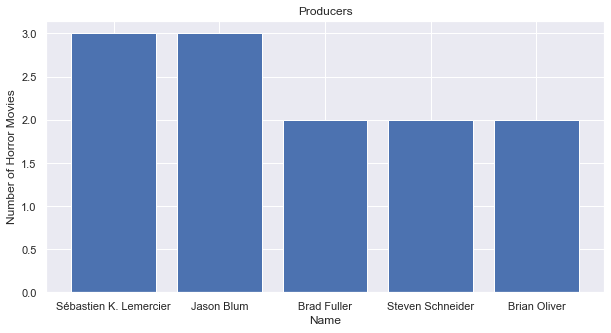

In [415]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(producer_name, producer_count)
ax.set_xlabel("Name")
ax.set_ylabel("Number of Horror Movies")
ax.set_title("Producers");